In [36]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold

import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from matplotlib import style 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline
from scipy.stats import loguniform
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

In [37]:
datos = pd.read_csv(filepath_or_buffer = "/Users/ninoj/Downloads/articulos_ml.csv")

In [38]:
datos

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660


In [39]:
datos.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


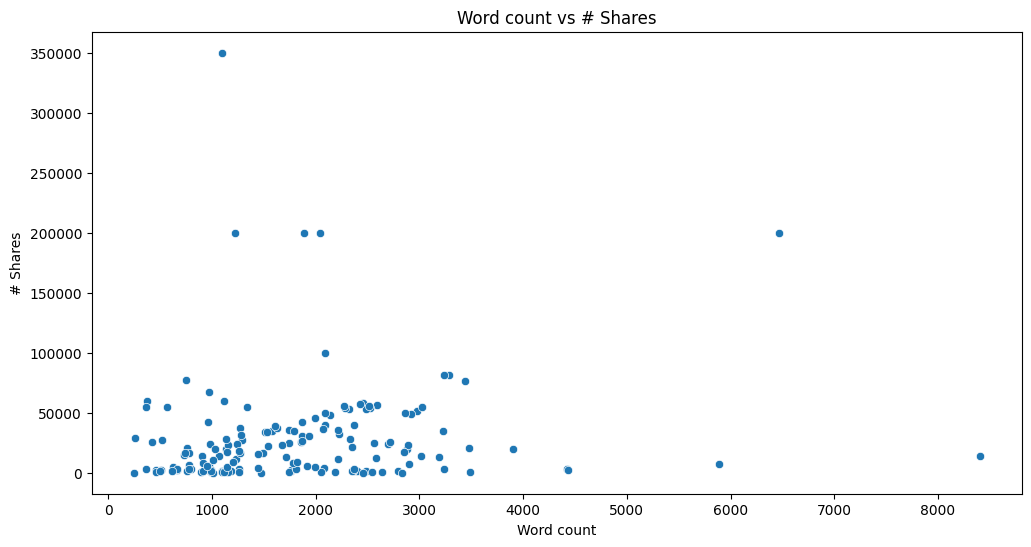

In [40]:
# Visualización de la relación entre variables
plt.figure(figsize=(12,6))
sns.scatterplot(x=datos['Word count'], y=datos['# Shares'])
plt.title('Word count vs # Shares')
plt.xlabel('Word count')
plt.ylabel('# Shares')
plt.show()

In [41]:
# Selección de variables predictoras
X = datos[['Word count', '# of Links', '# of comments', '# Images video', 'Elapsed days']].dropna()
y = datos['# Shares'].dropna()

In [42]:
X

,Word count,# of Links,# of comments,# Images video,Elapsed days
0,1888,1,2.0,2,34
2,962,6,0.0,1,10
4,2039,1,104.0,4,131
6,6462,600,28.0,2,170
7,753,3,0.0,1,78
...,...,...,...,...,...
156,3239,3,11.0,1,84
157,2566,3,8.0,4,85
158,2089,4,4.0,1,86
159,1530,4,12.0,3,87


In [43]:
y

0      200000
1       25000
2       42000
3      200000
4      200000
        ...  
156      3239
157     25019
158     49614
159     33660
160      5956
Name: # Shares, Length: 161, dtype: int64

In [44]:
# Unir X y y en un solo DataFrame para eliminar las filas con valores nulos en ambos
data = pd.concat([X, y], axis=1)

In [45]:
# Eliminar filas con valores nulos en todo el DataFrame (de X y y)
data_clean = data.dropna()

In [46]:
# Separar de nuevo X y y después de la limpieza
X_clean = data_clean.drop(columns=['# Shares'])
y_clean = data_clean['# Shares']

In [47]:
# Verificar que ahora tienen la misma longitud
print(f"X_clean shape: {X_clean.shape}")
print(f"y_clean shape: {y_clean.shape}")

X_clean shape: (129, 5)
y_clean shape: (129,)


In [48]:
# Dividir en conjunto de entrenamiento y prueba
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [52]:
# Crear el modelo de regresión lineal
model = LinearRegression()

In [54]:
# Definir el espacio de hiperparámetros para optimización
param_dist = {
    'fit_intercept': [True, False], # Si el modelo debe ajustar el intercepto
    'positive': [True, False],     # Si se debe normalizar
}

In [55]:
# Configuración de la validación cruzada
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [56]:
# Realizar búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_absolute_error', cv=cv, random_state=42)


In [57]:
# Entrenar el modelo con los datos escalados
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=42),
                   estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False],
                                        'positive': [True, False]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [58]:
# Mejor modelo encontrado
best_model = random_search.best_estimator_

In [59]:
# Realizar las predicciones
y_pred = best_model.predict(X_test)

In [60]:
# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [61]:
print(f"Mejores parámetros: {random_search.best_params_}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")
print(f"Coeficiente de determinación R^2: {r2}")

Mejores parámetros: {'positive': True, 'fit_intercept': False}
Error cuadrático medio (MSE): 552716857.8059026
Raíz del error cuadrático medio (RMSE): 23509.931046387665
Coeficiente de determinación R^2: -0.1831145744478595


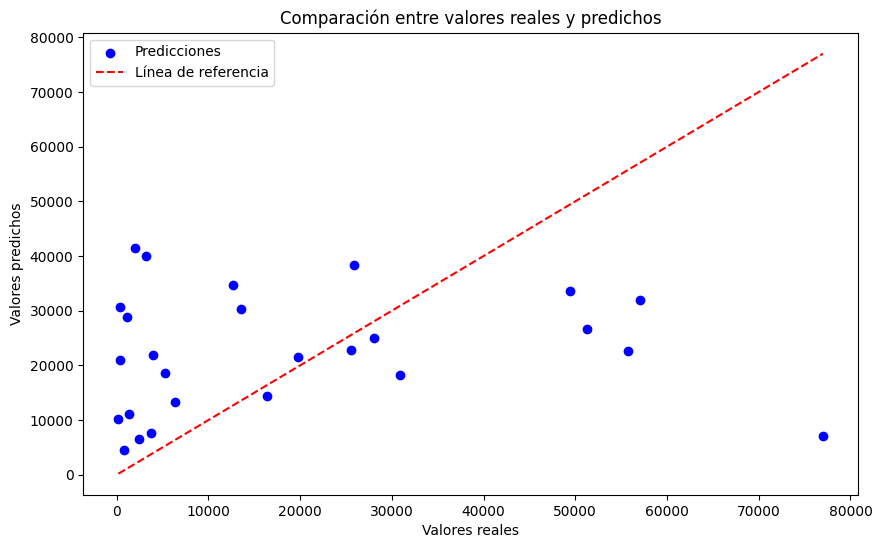

In [62]:
# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea de referencia')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Comparación entre valores reales y predichos')
plt.legend()
plt.show()